In [17]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [3]:
stock = pd.read_csv('Data Tesla 30sebelum.csv')
stock = stock.set_index('Date')
show = stock.head()
show = show.append(stock.tail())
show

,Open,High,Low,Close,Adj.Close,Volume
Date,,,,,,
2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500
2010-11-22,31.570000,33.450001,31.500000,33.400002,33.400002,1529700
2010-11-23,33.290001,35.680000,32.189999,34.570000,34.570000,1577800
2010-11-24,35.270000,35.970001,34.330002,35.470001,35.470001,1425000
2010-11-26,35.599998,36.000000,34.750000,35.320000,35.320000,350600
2019-10-02,243.289993,244.649994,239.429993,243.130005,243.130005,5631400
2019-10-03,231.860001,234.479996,224.279999,233.029999,233.029999,15084500
2019-10-04,231.610001,234.779999,228.070007,231.429993,231.429993,7995000
2019-10-07,229.800003,238.559998,228.550003,237.720001,237.720001,8064200


In [4]:
# Get the Adjusted Close Price 
stock = stock[['Adj.Close']] 
# Take a look at the new data 
print(stock.head())

            Adj.Close
Date                 
2010-11-19  30.990000
2010-11-22  33.400002
2010-11-23  34.570000
2010-11-24  35.470001
2010-11-26  35.320000


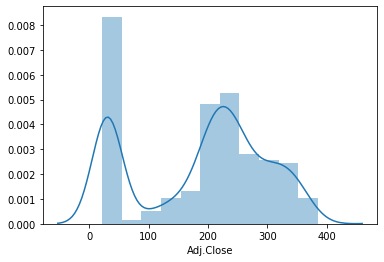

In [19]:
sns.distplot(stock['Adj.Close'])

In [5]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
stock['Prediction'] = stock[['Adj.Close']].shift(-forecast_out)
#print the new data set
print(stock.tail())

             Adj.Close  Prediction
Date                              
2019-10-02  243.130005         NaN
2019-10-03  233.029999         NaN
2019-10-04  231.429993         NaN
2019-10-07  237.720001         NaN
2019-10-08  240.050003         NaN


In [6]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(stock.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 30.99    ]
 [ 33.400002]
 [ 34.57    ]
 ...
 [222.149994]
 [211.399994]
 [215.      ]]


In [7]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(stock['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 26.67      26.83      27.879999 ... 231.429993 237.720001 240.050003]


In [8]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9215349843651329


In [15]:
x_forecast = np.array(stock.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[214.080002]
 [215.589996]
 [221.710007]
 [225.610001]
 [225.009995]
 [220.679993]
 [229.580002]
 [227.449997]
 [231.789993]
 [235.539993]
 [247.100006]
 [245.869995]
 [245.199997]
 [242.809998]
 [244.789993]
 [243.490005]
 [246.600006]
 [240.619995]
 [241.229996]
 [223.210007]
 [228.699997]
 [242.559998]
 [242.130005]
 [240.869995]
 [244.690002]
 [243.130005]
 [233.029999]
 [231.429993]
 [237.720001]
 [240.050003]]


In [16]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[215.24802838 216.68545839 222.51136731 226.22394394 225.65277171
 221.53085146 230.00316332 227.97551744 232.10695142 235.67674213
 246.68122934 245.51032752 244.87252681 242.59738115 244.48222589
 243.24470986 246.20525725 240.51262052 241.09330743 223.93928359
 229.16544768 242.3593951  241.95006577 240.75060657 244.38704004
 242.90200996 233.28736792 231.76425151 237.75198808 239.97001995]


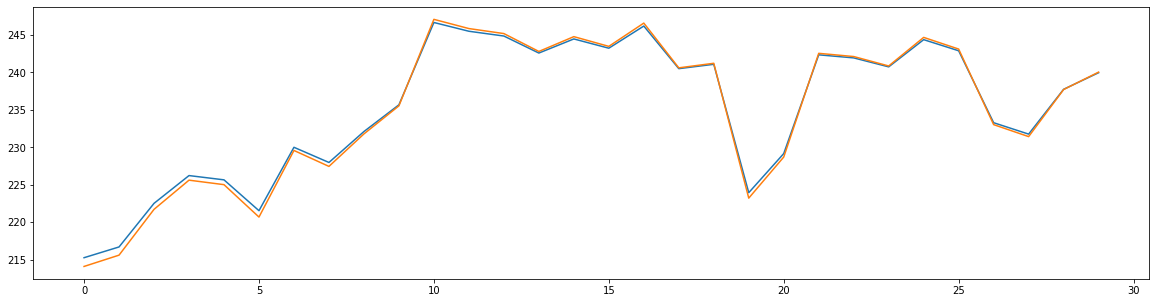

In [35]:

plt.figure(figsize = (20, 5))
plt.plot(lr_prediction, label='Prediksi')
plt.plot(x_forecast, label='Actual')
plt.show()
